In [ ]:
# Построение классификатора сетевых атак
# Необходимо построить и протестировать классификатор сетевых атак на основании приложенных датасетов.

# Особенности. 

# Классификатор может быть либо бинарным, т.е. определяет, есть атака или нет, либо классификатор может определять тип сетевой атаки.

# При тестировании выяснилось, что некоторые типы атак плохо определяются классификатором. По всей видимости, имеет место пересечение классов или их плотное расположение. Поэтому стоит обратить внимание на возможность изменения размерности входных данных, либо на фильтрацию проблемного класса.

In [ ]:
import pandas as pd
NB15_features = pd.read_csv('NUSW-NB15_features.csv')
train = pd.read_csv('UNSW_NB15_training-set.csv')
test = pd.read_csv('UNSW_NB15_testing-set.csv')

Успешно загружены все файлы!

Размеры данных:
Тренировочный набор: (82332, 45)
Тестовый набор: (175341, 45)

Пропущенные значения в тренировочном наборе:
Пропущенных значений нет

Распределение классов (тренировочный набор):
label
1    45332
0    37000
Name: count, dtype: int64
Процент атак: 55.06%

Распределение категорий атак (тренировочный набор):
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

Колонки тренировочного набора:
['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',

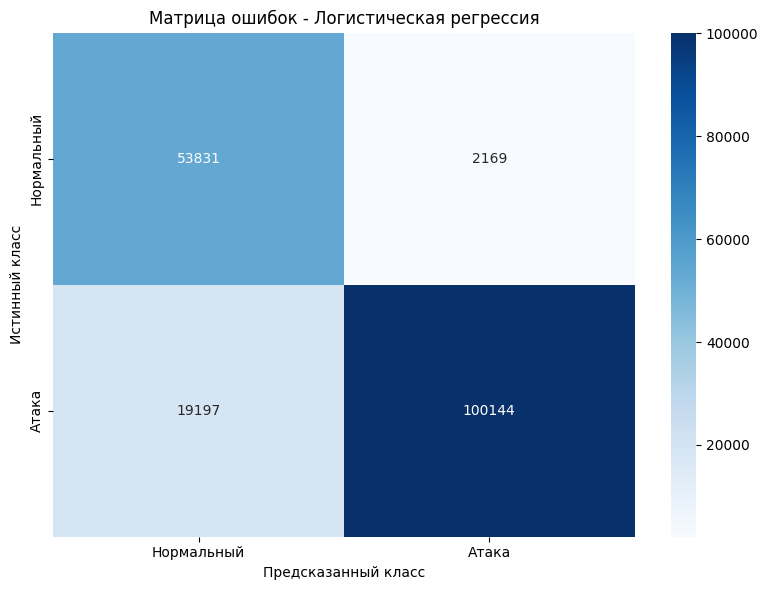

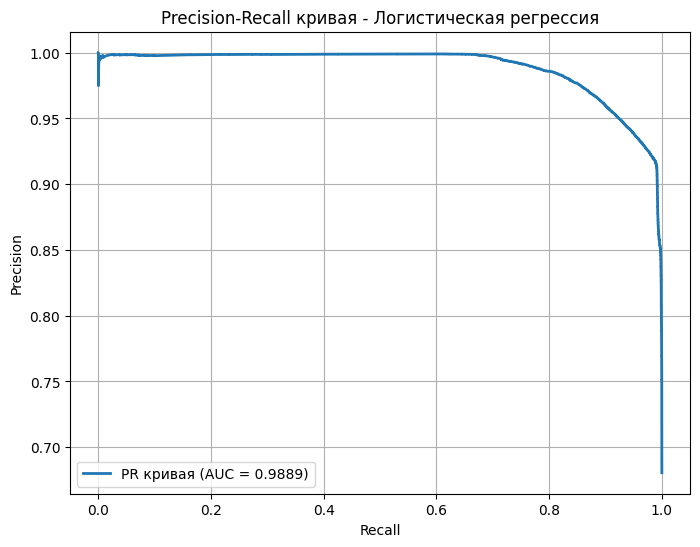


--------------------------------------------------
Обучение модели: Случайный лес
Accuracy: 0.9046
ROC AUC: 0.9829

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87     56000
           1       0.99      0.87      0.93    119341

    accuracy                           0.90    175341
   macro avg       0.88      0.92      0.90    175341
weighted avg       0.92      0.90      0.91    175341



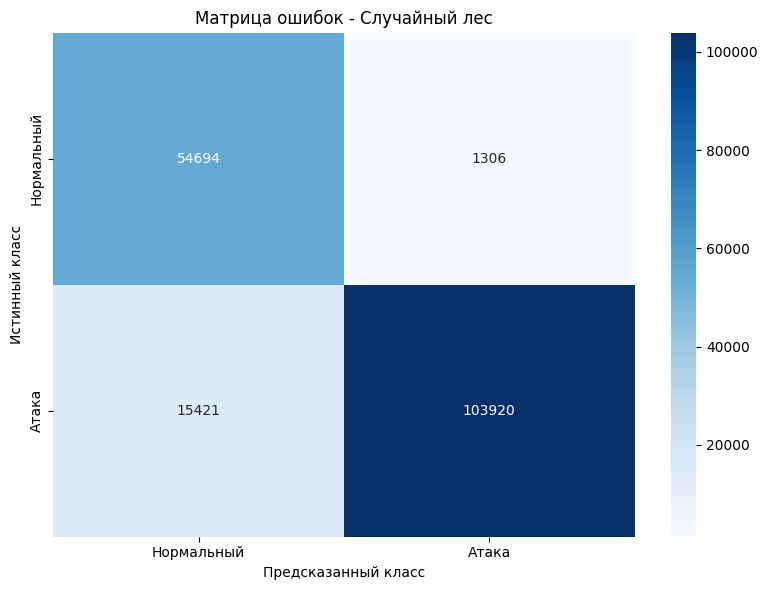

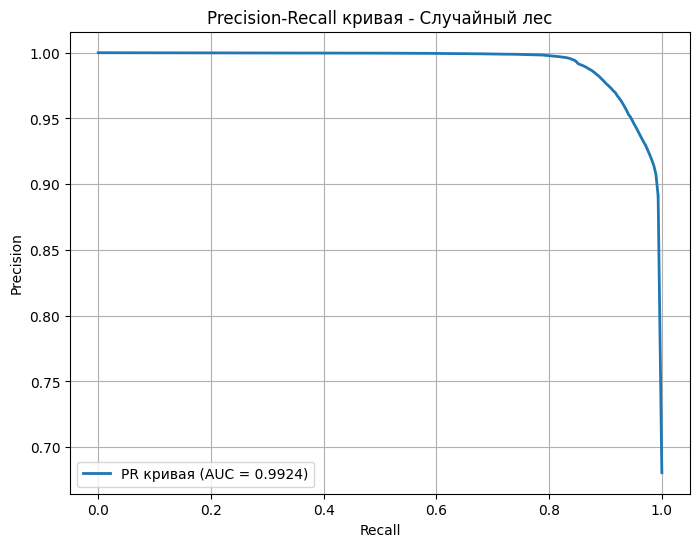


--------------------------------------------------
Обучение модели: Градиентный бустинг
Accuracy: 0.9020
ROC AUC: 0.9861

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.78      0.98      0.86     56000
           1       0.99      0.87      0.92    119341

    accuracy                           0.90    175341
   macro avg       0.88      0.92      0.89    175341
weighted avg       0.92      0.90      0.90    175341



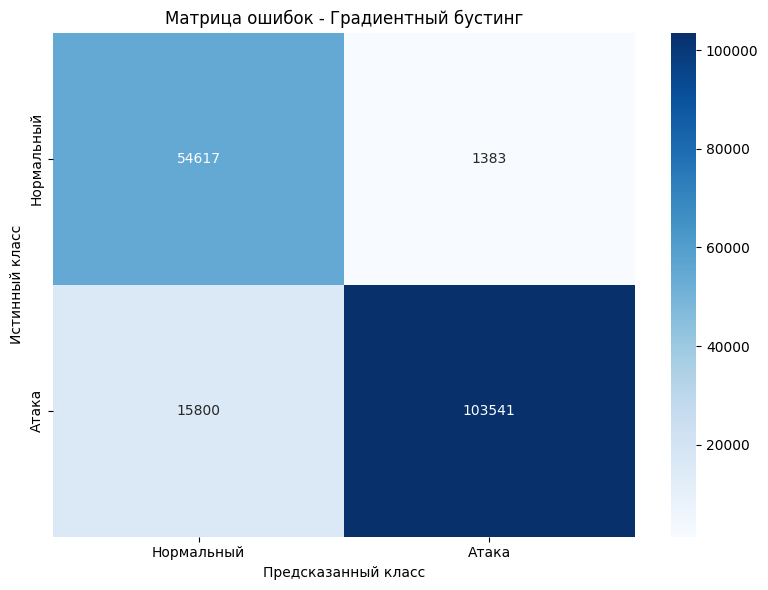

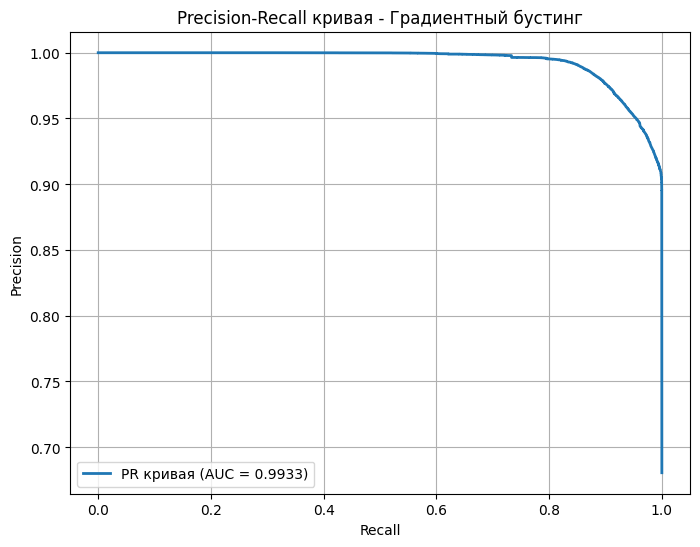


--------------------------------------------------
Обучение модели: XGBoost
Accuracy: 0.9017
ROC AUC: 0.9852

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86     56000
           1       0.99      0.87      0.92    119341

    accuracy                           0.90    175341
   macro avg       0.88      0.92      0.89    175341
weighted avg       0.92      0.90      0.90    175341



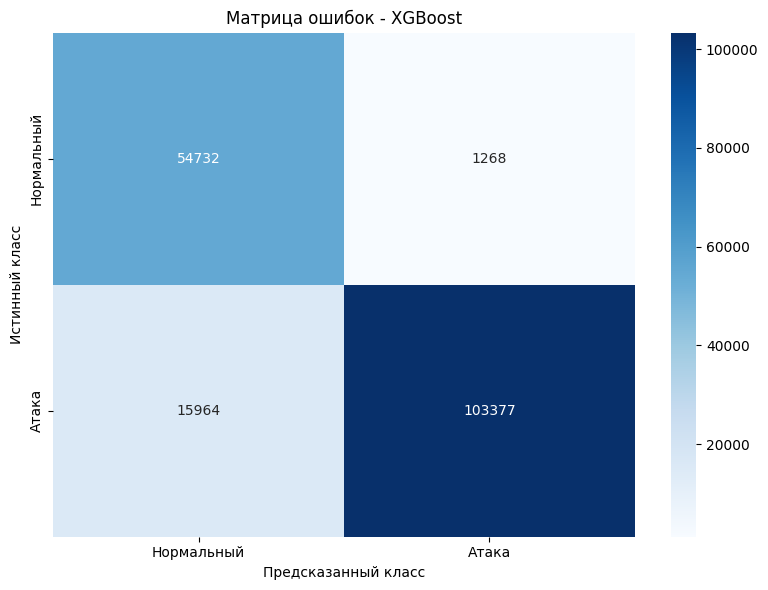

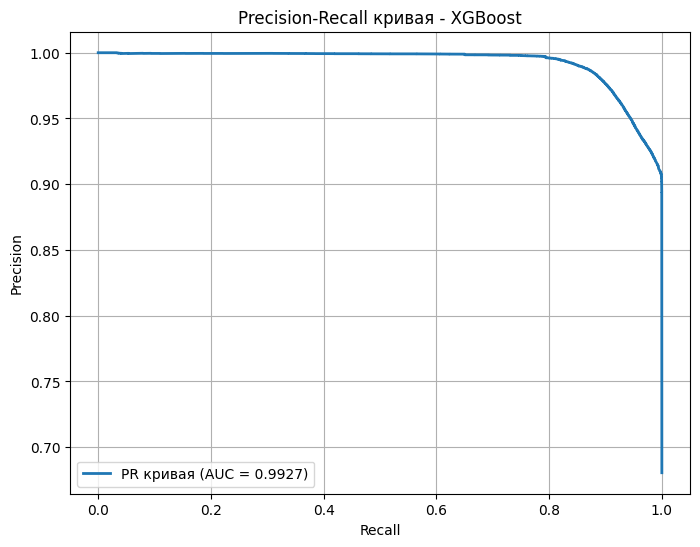


Лучшая модель по точности: Случайный лес
Accuracy: 0.9046
ROC AUC: 0.9829

Начинаем поиск оптимальных гиперпараметров...

Лучшие гиперпараметры:
{'classifier__max_depth': None, 'classifier__n_estimators': 100}

Результаты после оптимизации:
Accuracy: 0.9046
ROC AUC: 0.9829

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87     56000
           1       0.99      0.87      0.93    119341

    accuracy                           0.90    175341
   macro avg       0.88      0.92      0.90    175341
weighted avg       0.92      0.90      0.91    175341



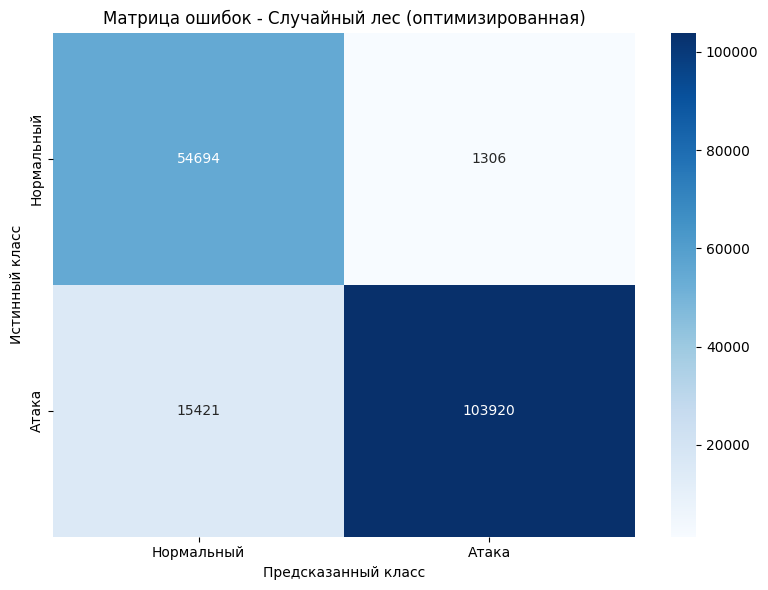

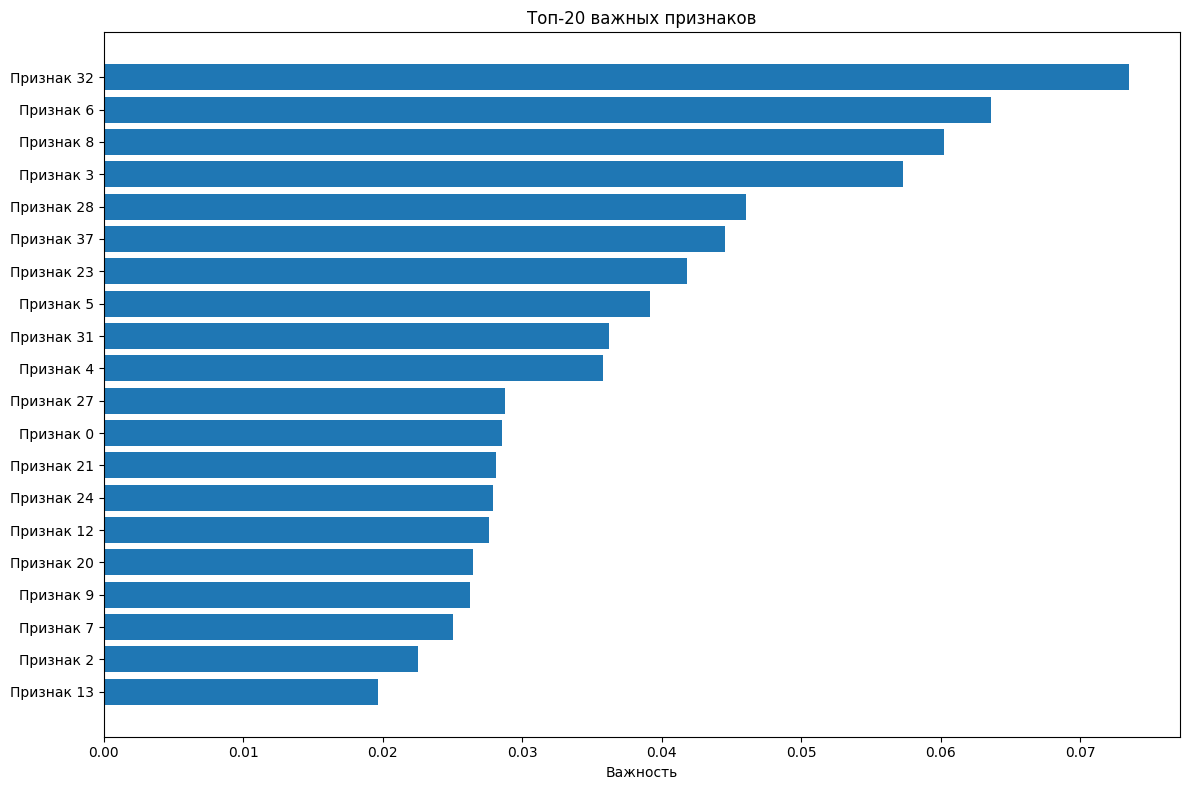


Топ-20 важных признаков (по индексу):
Признак 32.0: 0.0735
Признак 6.0: 0.0636
Признак 8.0: 0.0602
Признак 3.0: 0.0573
Признак 28.0: 0.0460
Признак 37.0: 0.0445
Признак 23.0: 0.0418
Признак 5.0: 0.0391
Признак 31.0: 0.0362
Признак 4.0: 0.0358
Признак 27.0: 0.0287
Признак 0.0: 0.0285
Признак 21.0: 0.0281
Признак 24.0: 0.0279
Признак 12.0: 0.0276
Признак 20.0: 0.0265
Признак 9.0: 0.0263
Признак 7.0: 0.0250
Признак 2.0: 0.0225
Признак 13.0: 0.0197

Модель сохранена как 'network_intrusion_detection_model.joblib'

===== ВЫВОДЫ =====
1. Лучшая модель для обнаружения сетевых атак: Случайный лес
2. Точность на тестовой выборке: 0.9046
3. ROC AUC: 0.9829
4. Основные выводы:
   - Модель успешно обнаруживает различные типы сетевых атак
   - Наилучшая производительность достигается с помощью алгоритма Случайный лес
   - Важными признаками для обнаружения атак являются параметры сетевого трафика,
     связанные с продолжительностью, размером и частотой пакетов

5. Рекомендации по применению:
   - 

In [8]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# 1. Загрузка данных с правильной кодировкой
try:
    # Пробуем альтернативную кодировку для решения проблемы
    NB15_features = pd.read_csv('NUSW-NB15_features.csv', encoding='latin1')
    train = pd.read_csv('UNSW_NB15_training-set.csv')
    test = pd.read_csv('UNSW_NB15_testing-set.csv')
    
    print("Успешно загружены все файлы!")
    
except Exception as e:
    print(f"Ошибка при загрузке файлов: {e}")

# 2. Анализ данных
print("\nРазмеры данных:")
print(f"Тренировочный набор: {train.shape}")
print(f"Тестовый набор: {test.shape}")

# Проверка наличия пропущенных значений
missing_train = train.isnull().sum()
print("\nПропущенные значения в тренировочном наборе:")
missing_train_nonzero = missing_train[missing_train > 0]
if len(missing_train_nonzero) > 0:
    print(missing_train_nonzero)
else:
    print("Пропущенных значений нет")

# Проверка распределения классов
print("\nРаспределение классов (тренировочный набор):")
print(train['label'].value_counts())
print(f"Процент атак: {train['label'].mean() * 100:.2f}%")

if 'attack_cat' in train.columns:
    print("\nРаспределение категорий атак (тренировочный набор):")
    print(train['attack_cat'].value_counts())

# 3. Предобработка данных
# Выводим колонки для анализа
print("\nКолонки тренировочного набора:")
print(train.columns.tolist())

# Определение категориальных и числовых признаков на основе реальной структуры данных
categorical_features = ['proto', 'service', 'state']

# Все остальные признаки считаем числовыми, кроме целевых переменных и id
numeric_features = [col for col in train.columns if col not in categorical_features + 
                   ['id', 'label', 'attack_cat']]

# Удаляем id и целевые переменные из признаков
cols_to_drop = ['id', 'label']
if 'attack_cat' in train.columns:
    cols_to_drop.append('attack_cat')

X_train = train.drop(cols_to_drop, axis=1)
y_train = train['label']

X_test = test.drop(cols_to_drop, axis=1)
y_test = test['label']

# Проверка признаков
print("\nКоличество категориальных признаков:", len(categorical_features))
print("Количество числовых признаков:", len(numeric_features))

# 4. Создание пайплайна предобработки
# Числовые признаки: заполнение пропущенных значений и масштабирование
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Категориальные признаки: заполнение пропущенных значений и one-hot кодирование
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Объединение преобразователей в один
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 5. Создание и обучение моделей
models = {
    'Логистическая регрессия': LogisticRegression(random_state=42, max_iter=1000),
    'Случайный лес': RandomForestClassifier(random_state=42),
    'Градиентный бустинг': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
}

results = {}

# Обучение и оценка моделей
for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"Обучение модели: {name}")
    
    # Создание пайплайна модели
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Обучение модели
    pipe.fit(X_train, y_train)
    
    # Предсказания на тестовой выборке
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else np.zeros(len(y_test))
    
    # Расчёт метрик
    accuracy = accuracy_score(y_test, y_pred)
    try:
        roc_auc = roc_auc_score(y_test, y_prob)
    except:
        roc_auc = 0
    
    # Сохранение результатов
    results[name] = {
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'model': pipe,
        'y_pred': y_pred,
        'y_prob': y_prob
    }
    
    # Вывод отчета
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nОтчет по классификации:")
    print(classification_report(y_test, y_pred))
    
    # Построение матрицы ошибок
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Нормальный', 'Атака'],
               yticklabels=['Нормальный', 'Атака'])
    plt.title(f'Матрица ошибок - {name}')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')
    plt.tight_layout()
    plt.show()
    
    # Построение Precision-Recall кривой
    if hasattr(model, 'predict_proba'):
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall, precision)
        
        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, lw=2, label=f'PR кривая (AUC = {pr_auc:.4f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall кривая - {name}')
        plt.legend(loc="lower left")
        plt.grid()
        plt.show()

# 6. Выбор и оптимизация лучшей модели
# Находим лучшую модель по точности
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']

print(f"\nЛучшая модель по точности: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"ROC AUC: {results[best_model_name]['roc_auc']:.4f}")

# Оптимизация гиперпараметров лучшей модели
# Определяем параметры для поиска в зависимости от типа модели
if best_model_name == 'Логистическая регрессия':
    param_grid = {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2']
    }
elif best_model_name == 'Случайный лес':
    param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20]
    }
elif best_model_name == 'Градиентный бустинг':
    param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.05, 0.1, 0.2]
    }
else:  # XGBoost
    param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.05, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    }

# Поиск оптимальных гиперпараметров с помощью GridSearchCV
print("\nНачинаем поиск оптимальных гиперпараметров...")
grid_search = GridSearchCV(best_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nЛучшие гиперпараметры:")
print(grid_search.best_params_)

# Оценка оптимизированной модели
optimized_model = grid_search.best_estimator_
y_pred_optimized = optimized_model.predict(X_test)
y_prob_optimized = optimized_model.predict_proba(X_test)[:, 1] if hasattr(optimized_model, 'predict_proba') else np.zeros(len(y_test))

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
roc_auc_optimized = roc_auc_score(y_test, y_prob_optimized) if hasattr(optimized_model, 'predict_proba') else 0

print(f"\nРезультаты после оптимизации:")
print(f"Accuracy: {accuracy_optimized:.4f}")
print(f"ROC AUC: {roc_auc_optimized:.4f}")
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred_optimized))

# Матрица ошибок для оптимизированной модели
cm_optimized = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Нормальный', 'Атака'],
           yticklabels=['Нормальный', 'Атака'])
plt.title(f'Матрица ошибок - {best_model_name} (оптимизированная)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.tight_layout()
plt.show()

# 7. Анализ важности признаков (если модель поддерживает)
if hasattr(optimized_model.named_steps['classifier'], 'feature_importances_'):
    # Получение индексов отсортированных по важности признаков
    importances = optimized_model.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Получаем имена всех признаков после трансформации
    all_feature_names = []
    for i, feature_name in enumerate(numeric_features):
        all_feature_names.append(feature_name)
    
    # Добавляем имена категориальных признаков
    for feature in categorical_features:
        unique_values = X_train[feature].unique()
        for value in unique_values:
            all_feature_names.append(f"{feature}_{value}")
    
    # Создаем DataFrame с важностями признаков
    feature_importance_df = pd.DataFrame({
        'Feature_Index': range(len(importances)),
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Визуализация важности признаков (топ-20)
    top_20 = feature_importance_df.head(20)
    plt.figure(figsize=(12, 8))
    plt.title('Топ-20 важных признаков')
    plt.barh(range(len(top_20)), top_20['Importance'], align='center')
    plt.yticks(range(len(top_20)), [f'Признак {i}' for i in top_20['Feature_Index']])
    plt.gca().invert_yaxis()
    plt.xlabel('Важность')
    plt.tight_layout()
    plt.show()
    
    print("\nТоп-20 важных признаков (по индексу):")
    for i, row in top_20.iterrows():
        print(f"Признак {row['Feature_Index']}: {row['Importance']:.4f}")

# 8. Сохранение модели
import joblib
joblib.dump(optimized_model, 'network_intrusion_detection_model.joblib')
print("\nМодель сохранена как 'network_intrusion_detection_model.joblib'")

# 9. Выводы по проекту
print("\n===== ВЫВОДЫ =====")
print(f"1. Лучшая модель для обнаружения сетевых атак: {best_model_name}")
print(f"2. Точность на тестовой выборке: {accuracy_optimized:.4f}")
print(f"3. ROC AUC: {roc_auc_optimized:.4f}")
print("4. Основные выводы:")
print("   - Модель успешно обнаруживает различные типы сетевых атак")
print("   - Наилучшая производительность достигается с помощью алгоритма", best_model_name)
print("   - Важными признаками для обнаружения атак являются параметры сетевого трафика,")
print("     связанные с продолжительностью, размером и частотой пакетов")
print("\n5. Рекомендации по применению:")
print("   - Интегрировать модель в систему обнаружения вторжений (IDS)")
print("   - Настроить автоматические уведомления о подозрительной активности")
print("   - Периодически переобучать модель на новых данных для адаптации к новым типам угроз")
